In [43]:
# Librerias

import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import random


Covención de colores

- Np (No hay nada en la celda): Negro rgb(000,000,000)
- Ps (Personas sanas): Amarillo rgb(255,255,0)
- Cs (Persona con Covid-19 sintomática): Verde rgb(0,255,0)
- Cns (Persona con Covid-19 asintomática ): Rosada rgb(255,0,128)
- Ct (Persona con Covid-19 en cuarentena o en cuidados médicos): Rojo rgb(255,0,0)
- Pac (Persona curada con anticuerpos): Azul rgb(0,0,255)
- M (Persona muerta): Negro rgb(0,0,0)


In [44]:
class Celda:
    def __init__(self,estado,probabilidad,pos1D,col):
        self.estado = estado
        self.probabilidad = probabilidad
        self.pos1D=pos1D
        self.columnas=col
        self.pos2D=self.funPosicion2D()
        self.color=self.funColor()
        self.numeroDeCiclos=0

    def funColor(self):
        if self.estado=='Np':
            return [0,0,0]
        elif self.estado=='Ps':
            return [255,255,0]
        elif self.estado=='Cs':
            return [0,255,0]
        elif self.estado=='Cns':
            return [255,0,128]
        elif self.estado=='Ct':
            return [255,0,0]
        elif self.estado=='Pac':
            return [0,0,255]
        else:
            return [163,73,164]
    
    def actualizar(self):
        self.color=self.funColor()
    
    def funPosicion2D(self):
        return [int(self.pos1D/self.columnas),self.pos1D%self.columnas]
    

In [45]:
# Longitud del retículo
longitud_L=10_000 

# Dimensiones de la matriz
n=int(longitud_L**0.5)
m=int(longitud_L**0.5)

# Se crea una imagen blanca RGB
L=np.ones((n,m,3),dtype=np.uint8)*255

# Se establece el número de alfabetos
nPs=5_000
nCs=5
nCns=5

# Se extrae un lista aleatoria sin repetirse de posiciones
posicionesOcupadas=random.sample(np.arange((n*m)).tolist(),
    nPs+nCs+nCns)

lisTotal=[]
contador=0
while contador<nPs:
    lisTotal.append(Celda('Ps',0.0,posicionesOcupadas[contador],m))
    contador+=1

while contador<nPs+nCs:
    lisTotal.append(Celda('Cs',0.0,posicionesOcupadas[contador],m))
    contador+=1

while contador<nPs+nCs+nCns:
    lisTotal.append(Celda('Cns',0.0,posicionesOcupadas[contador],m))
    contador+=1

posicionesOcupadas.sort()

# Ordenar los objetos según su posición
# https://stackoverflow.com/questions/403421/how-to-sort-a-list-of-objects-based-on-an-attribute-of-the-objects
# lis_total.sort(key=lambda x: x.posicion, reverse=False)


# Creación de celdas vacias
contador=0
for i in range(n*m):
    if i==posicionesOcupadas[contador]:
        
        if contador+1<len(posicionesOcupadas):
            contador+=1

        continue
    
    lisTotal.append(Celda('Np',0.0,i,m))


In [46]:
# Zona de verificación
nPs=0
nCs=0
nCns=0
nNp=0
for i in lisTotal:
    if i.estado=='Ps':
        nPs+=1
    elif i.estado=='Cs':
        nCs+=1
    elif i.estado=='Cns':
        nCns+=1
    elif i.estado=='Np':
        nNp+=1

print(f' nPs={nPs}\n nCs={nCs}\n nCns={nCns}\n \
nNp={nNp}')

 nPs=5000
 nCs=5
 nCns=5
 nNp=4990


(([], []), ([], []))

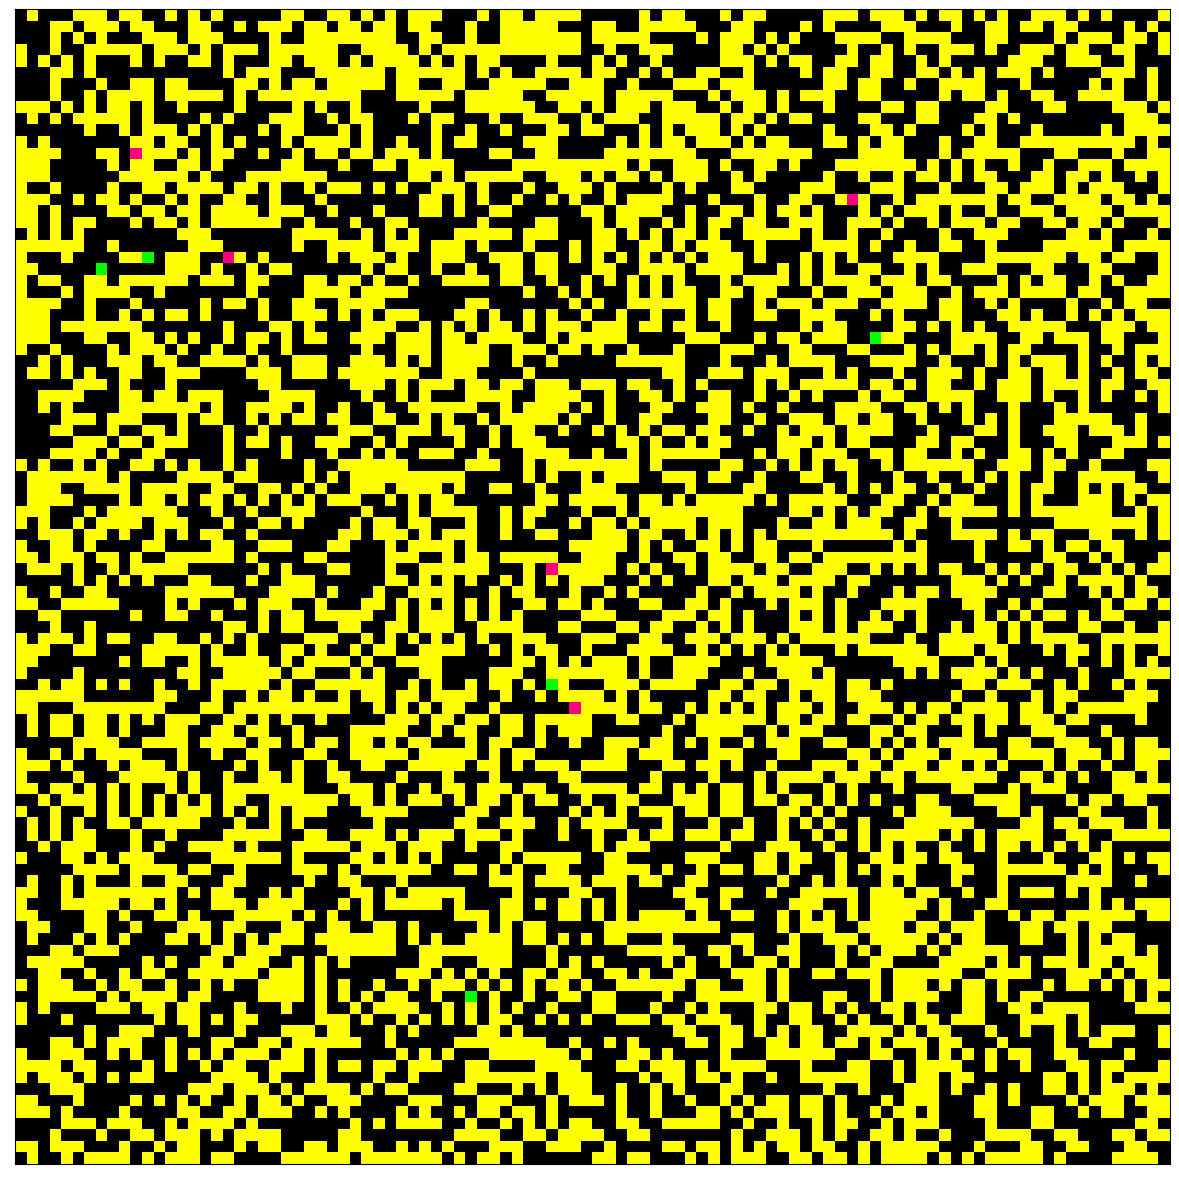

In [47]:
# Creación de imagen 

for i in lisTotal:
    # Configuación del R
    L[i.pos2D[0],i.pos2D[1],0]=i.color[0]

    # Configuación del G
    L[i.pos2D[0],i.pos2D[1],1]=i.color[1]

    # Configuación del B
    L[i.pos2D[0],i.pos2D[1],2]=i.color[2]

# Se imprime
plt.figure(figsize=(15, 15))
plt.imshow(L)
plt.xticks([]),plt.yticks([])


In [48]:
# Comprobacion de asignación correcta de toda la matriz

revisar=False
for i in range(n):
    for j in range(m):
        if L[i,j,0]==255 and L[i,j,1]==255 and L[i,j,2]==255:
            revisar=True
if revisar:
    print('Revisar')
else:
    print('Todo bien')

Todo bien
